<h2 style="text-align: center;">Lab-06</h2>
<h2 style="text-align: center; text-decoration: underline;">Logistic_Regression</h2>

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.special import expit  # Sigmoid function
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [103]:
# Load datasets
x_path = "logisticX.csv"
y_path = "logisticY.csv"

logisticX = pd.read_csv(x_path, header=None)
logisticY = pd.read_csv(y_path, header=None)

In [105]:
# Convert data to numpy arrays
X = logisticX.to_numpy()
y = logisticY.to_numpy().flatten()

In [107]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [109]:
# Add bias term (column of ones)
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [51]:
# Initialize parameters
theta = np.zeros(X.shape[1])

def sigmoid(z):
    return expit(z)

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    
    for _ in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

#### Q1: Use logistic regression to find decision boundary For the given database. Set your learning rate to 0.1. What is the cost function value and learning paramet value after convergence?

In [190]:
alpha = 0.1
num_iters_full = 10000
theta_final, cost_history_full = gradient_descent(X, y, np.zeros(X.shape[1]), alpha, num_iters_full)

In [192]:
print(f"Final Cost Function Value: {cost_history_full[-1]:.4f}")
print("Final Theta Values (Decision Boundary Parameters):")
print(theta_final)

Final Cost Function Value: 0.2283
Final Theta Values (Decision Boundary Parameters):
[ 0.40125293  2.5885471  -2.72558781]


#### Q2: Plot cost function v/s iteration graph for the model trained in question 1. Do not use scatter plots for this.

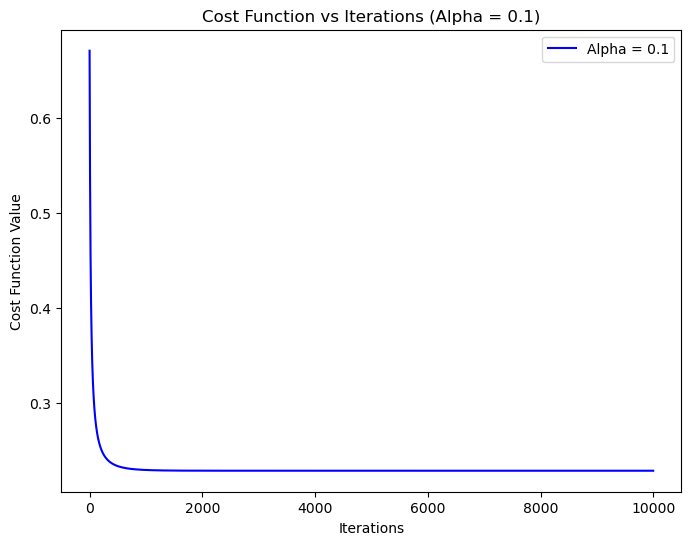

In [185]:
plt.figure(figsize=(8,6))
plt.plot(range(num_iters_full), cost_history_full, label='Alpha = 0.1', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iterations (Alpha = 0.1)')
plt.legend()
plt.show()

#### Q3: Plot the given dataset on a graph, use different colours for different classes and also show the decision boundary you obtained in question 1. Do not use scatter plot.

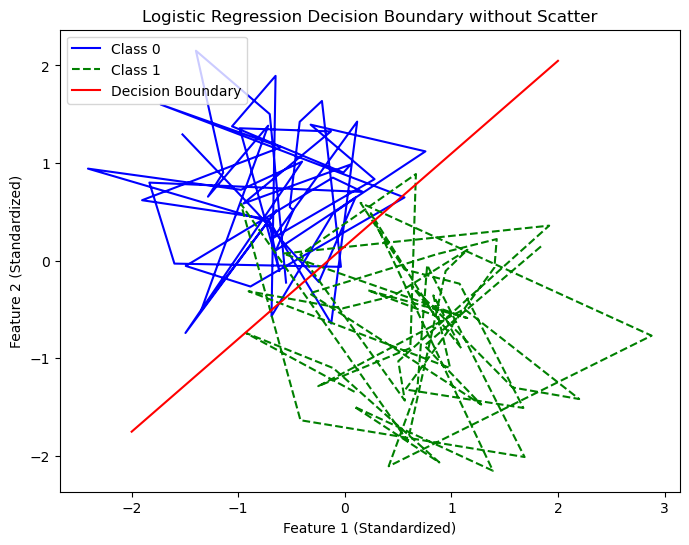

In [195]:
plt.figure(figsize=(8,6))
# Plot class 0 as a continuous line
class_0 = X[y == 0]
plt.plot(class_0[:, 1], class_0[:, 2], linestyle='solid', color='blue', label='Class 0')
# Plot class 1 as a dashed line
class_1 = X[y == 1]
plt.plot(class_1[:, 1], class_1[:, 2], linestyle='dashed', color='green', label='Class 1')
# Decision boundary: theta_0 + theta_1*x1 + theta_2*x2 = 0
x_values = np.linspace(-2, 2, 100)
y_values = -(theta_final[0] + theta_final[1] * x_values) / theta_final[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='red')

plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.title('Logistic Regression Decision Boundary without Scatter')
plt.show()

#### Q4: Train your model with a learning rate of 0.1 and 5. Plot the cost-function v/s iteration curve for both learning rates on the same graph. For this task, only train your model for 100 iterations.

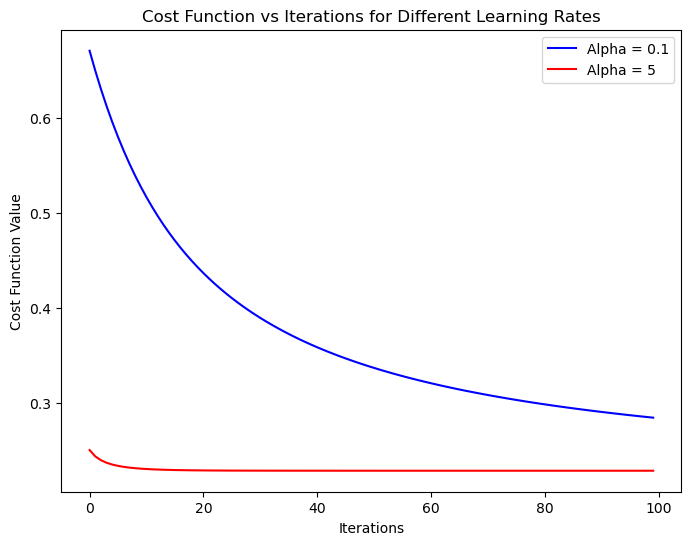

In [199]:
num_iters = 100
alpha_1 = 0.1
alpha_2 = 5

theta_1, cost_history_1 = gradient_descent(X, y, np.zeros(X.shape[1]), alpha_1, num_iters)
theta_2, cost_history_2 = gradient_descent(X, y, np.zeros(X.shape[1]), alpha_2, num_iters)
plt.figure(figsize=(8,6))
plt.plot(range(num_iters), cost_history_1, label=f'Alpha = {alpha_1}', color='blue')
plt.plot(range(num_iters), cost_history_2, label=f'Alpha = {alpha_2}', color='red')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iterations for Different Learning Rates')
plt.legend()
plt.show()

#### Q5: Find the confusion matrix for your training dataset. Using the confusion matrix to calculate the accuracy, precision, recall, F1-score.

In [174]:
# Q5: Compute predictions
y_pred = (sigmoid(X @ theta_final) >= 0.5).astype(int)

In [176]:
# Q5: Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[45  5]
 [ 7 43]]


In [178]:
# Q5: Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8800
Precision: 0.8958
Recall: 0.8600
F1-Score: 0.8776
